In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/cursoIA/Advertising.csv')
print(data.columns)
data.head()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


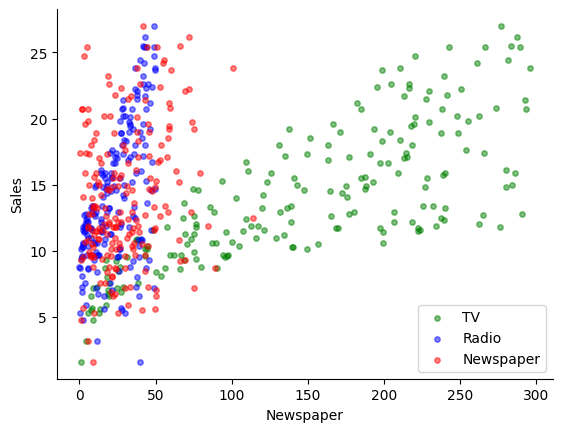

In [ ]:
# @title Newspaper vs Sales

from matplotlib import pyplot as plt
ax=data.plot(kind='scatter', x='TV', y='Sales', color='Green', s=15, alpha=.5,label='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

data.plot(kind='scatter', x='Radio', y='Sales', color='Blue', s=15, alpha=.5,label='Radio', ax=ax)
plt.gca().spines[['top', 'right',]].set_visible(False)


data.plot(kind='scatter', x='Newspaper', y='Sales',color='Red', s=15, alpha=.5,label='Newspaper', ax=ax)
plt.gca().spines[['top', 'right',]].set_visible(False)

#mostrar datos

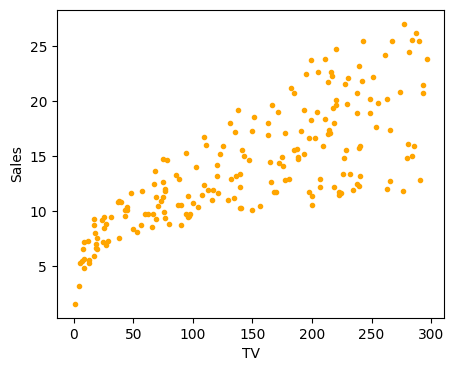

In [ ]:
import matplotlib.pyplot as plt
# print(data.describe)
plt.figure(figsize=[5,4])

# plt.subplot(1,3,1)
plt.scatter(data['TV'],data['Sales'],marker='.',color='orange')
plt.xlabel('TV')
plt.ylabel('Sales')

# plt.subplot(1,3,2)
# plt.scatter(data['Radio'],data['Sales'],color='green')
# plt.xlabel('Radio')
# plt.ylabel('Sales')

# plt.subplot(1,3,3)
# plt.scatter(data['Newspaper'],data['Sales'],color='blue')
# plt.xlabel('Newspaper')
# plt.ylabel('Sales')

plt.show()

# import matplotlib.pyplot as plt

# columns_lst = list(data.columns)[1:4]
# print(columns_lst)
# plt.figure(figsize=[10,7])

# # print([data['# Shares']]*5)

# for i,col in enumerate(columns_lst):
#     plt.subplot(2,3,i+1)
#     plt.scatter(data[col],data['Sales'],marker='.',cmap='gray')
#     plt.xlabel(col)
#     plt.ylabel('Sales')

# plt.show()

#covarianza

La covarianza entre dos variables aleatorias X e Y se define como:

$Cov(X,Y) = E[(X-E[X])(Y-E[Y])]$

$Cov(X,Y)= \frac{1}{n}\Sigma (X-E[x])(Y-E[Y])$

In [ ]:
def covar(x,y):
    x1 = x - np.mean(x)
    y1 = y - np.mean(y)
    # sum1 = np.dot(x1,y1)
    sum1 = sum(x1*y1)
    return sum1/(len(x)-1)

In [ ]:
import numpy as np
from numpy import cov

c = np.cov(data['TV'], data['Sales'])
columns_lst = list(data.columns) [1:6]
print("print with handmade function")
for col in columns_lst:
    print(covar(data[col],data['Sales']))

print("print using numpy function")
for col in columns_lst:
    print(cov(data[col],data['Sales'],bias=False)[0,1])

print with handmade function
350.390194723618
44.63568844221103
25.94139195979899
27.22185301507536
print using numpy function
350.39019472361804
44.635688442211034
25.94139195979899
27.22185301507536


In [ ]:
# sum_cov = 4x1 dot 1x4

print(columns_lst)

print(data[columns_lst].cov())
cov_mat = np.zeros((4,4))
for i,x in enumerate(columns_lst):
    for e,y in enumerate(columns_lst):
        cov_mat[e,i] = covar(data[x],data[y])
print(cov_mat)

['TV', 'Radio', 'Newspaper', 'Sales']
                    TV       Radio   Newspaper       Sales
TV         7370.949893   69.862492  105.919452  350.390195
Radio        69.862492  220.427743  114.496979   44.635688
Newspaper   105.919452  114.496979  474.308326   25.941392
Sales       350.390195   44.635688   25.941392   27.221853
[[7370.94989322   69.86249246  105.91945226  350.39019472]
 [  69.86249246  220.42774271  114.49697889   44.63568844]
 [ 105.91945226  114.49697889  474.30832563   25.94139196]
 [ 350.39019472   44.63568844   25.94139196   27.22185302]]


#Correlacion de Pearson
$\rho_{x,y} = \frac{\sigma_{xy}}{\sigma_x\sigma_y} = \frac{cov(x,y)}{\sqrt{var(x)*var(y)}}$

donde

$\sigma_{xy}$ es la coavarianza de x,y

$\sigma_x$ es la desviacion estandar de x

In [ ]:
def corr_pearson(x,y):
    rho_xy = covar(x,y)/np.sqrt(covar(x,x)*covar(y,y))
    return rho_xy

In [ ]:
print("Perason correlation using handmade-function")
corr_mat = np.zeros((4,4))
for i,x in enumerate(columns_lst):
    for e,y in enumerate(columns_lst):
        corr_mat[e,i] = corr_pearson(data[x],data[y])

print(corr_mat)
print("Perason correlation using numpy's function")
print(data[columns_lst].corr())

Perason correlation using handmade-function
[[1.         0.05480866 0.05664787 0.78222442]
 [0.05480866 1.         0.35410375 0.57622257]
 [0.05664787 0.35410375 1.         0.22829903]
 [0.78222442 0.57622257 0.22829903 1.        ]]
Perason correlation using numpy's function
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


$h_\theta(x)=\theta_1 x + \theta_0$

MSE:

$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta (x_i)-y_i)^2$

MAE

$J(\theta)=\frac{1}{2m}\sum_{i=1}^m|h_\theta (x_i)-y_i|$

['TV', 'Radio', 'Newspaper', 'Sales']


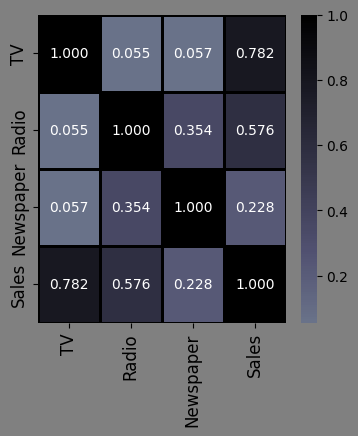

In [ ]:
import seaborn as sns
print(columns_lst)
def graf_calor(data):

  correlacion = data[columns_lst].corr()
  fig, ax = plt.subplots(figsize = (4,4),  facecolor = ('gray') )
  plt.xticks(fontsize = 12, color = 'black')
  plt.yticks(fontsize = 12, color = 'black')

  sns.heatmap(correlacion, center = 0, vmax = 1.0, fmt = '.3f', linewidths = 2, linecolor = 'black', cmap = 'bone_r', annot = True) # annot posiciona valores en la grafica/ fmt decimales/ cmap colores
  plt.show();

#Días transcurridos = Elapsed days
X = ['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days','# Shares']

graf_calor(data)

In [ ]:
import numpy as np
def hip(theta_0,theta_1,x):
    h = theta_1*x + theta_0
    return h

def MSE(theta0,theta1,x,y):
    block = hip(theta0,theta1,x) - y

    m = len(x)
    return sum(block*block)/(2*m)

def MAE(theta0,theta1,x,y):
    block = hip(theta0,theta1,x) - y

    m = len(x)
    return (1/2*m)*sum(abs(block))



Costo: 5.273693007331075


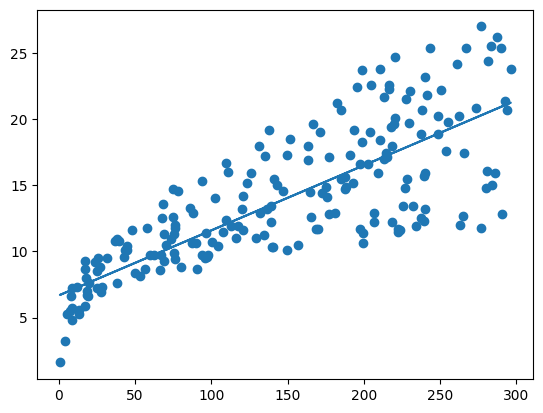

In [ ]:
# columns_lst = list(data.columns)[1:5]
theta0=6.67
theta1=0.049155555
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
x = data['TV']
y = data['Sales']

h = hip(theta0,theta1,x)
costo = MSE(theta0 , theta1 , x , y)
print("Costo: "+str(costo))

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

Tarea para e jueves, vamos aimplementar el gd para el error cuadrático medio y aplicar en una de las tres variables de la base de datos para TV, radio y periódicos. Vamos a normalizar, mediante el máximo y minimo de los valores de tv, radio y periódico. De modo que distribuimos de una forma libre los datos, y los acotamos entre 0 y 1. De esta manera, que se entrena mas rápido, ay que hacerlo con y sin normalización, deberíamos encontrar valores parecidos a los encontrados a mano.  Las thetas se eligirian aleatoriamente entre 0 y 1. Aplicar gd al mse.

Realizar un programa que aplique el gradiente descendente para la función

$h_\theta(x)=\theta_1 x + \theta_0$

MSE:

$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta (x_i)-y_i)^2$

el algoritmo Gradiente descendiente se repite hasta alcanzar converger

$\theta_0:=\theta_0-\frac{\alpha}{m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)$

$\theta_1:=\theta_1-\frac{\alpha}{m}\sum_{i=1}^m (h_{\theta}(x_i)-y_i)x_i$

In [ ]:
theta_0=5
theta_1=0.0

In [ ]:
# y=data['Sales']
# x=data['TV']

# theta_0=7.032593038945596
# theta_1=0.04753664302381351

m = len(data['Sales'])
mse = MSE(theta_0,theta_1,x,y)

alpha = 6e-5
epochs = 1000000;
list_theta0 = []
list_theta1 = []
list_mse = []

list_theta0.append(theta_0)
list_theta1.append(theta_1)
list_mse.append(mse)

for epoch in range(epochs):
    theta_0 = theta_0 - (alpha/m)*sum( hip(theta_0,theta_1,x) - y )
    theta_1 = theta_1 - (alpha/m)*sum( ( hip(theta_0,theta_1,x) - y )*x )
    mse = MSE(theta_0,theta_1,x,y)
    list_theta0.append(theta_0)
    list_theta1.append(theta_1)
    list_mse.append(mse)

print("list theta0 max value: "+str(max(list_theta0))+", min value: "+str(min(list_theta0)))
print("list theta0 first value: "+str(list_theta0[0])+", last value: "+str(list_theta0[-1]))
print("list theta1 max value: "+str(max(list_theta1))+", min value: "+str(min(list_theta1)))
print("list theta1 first value: "+str(list_theta1[0])+", last value: "+str(list_theta1[-1]))
print("list MSE max value: "+str(max(list_mse))+", min value: "+str(min(list_mse)))
print("list MSE first value: "+str(list_mse[0])+", last value: "+str(list_mse[-1]))


list theta0 max value: 7.032593038945596, min value: 5
list theta0 first value: 5, last value: 7.032593038945596
list theta1 max value: 0.10051497591255747, min value: 0.0
list theta1 first value: 0.0, last value: 0.04753664302381351
list MSE max value: 54.24562499999999, min value: 5.256326457828405
list MSE first value: 54.24562499999999, last value: 5.256326457828409


ajuste de la funcion

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)

# y = data['# Shares']
costo = MSE(theta_0 , theta_1 , x , y)
print("theta_0: "+str(theta_0) \
        +" theta_1: "+str(theta_1))
print("Costo: ",costo)

import matplotlib.pyplot as plt
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(x,y,marker='.')
plt.plot(x,h)
plt.show()

NameError: name 'theta_0' is not defined

progreso del entrenamiento

In [ ]:
R2 = 1 - sum((h-y)**2)/sum((y-np.mean(y))**2)
print(R2)

0.6105927120918673


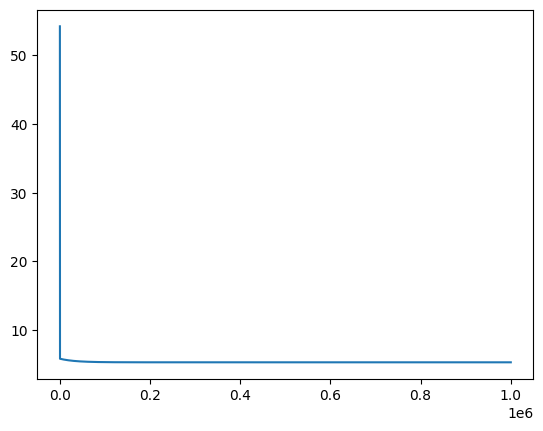

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)

# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse)
plt.show()

5.838592434574082


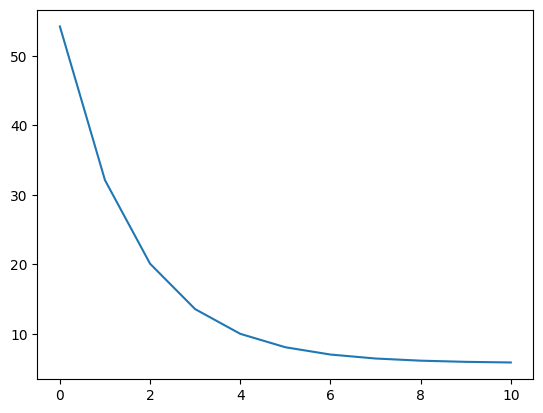

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)
print(list_mse[11])
# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse[0:11])
plt.show()

5.777650260717689


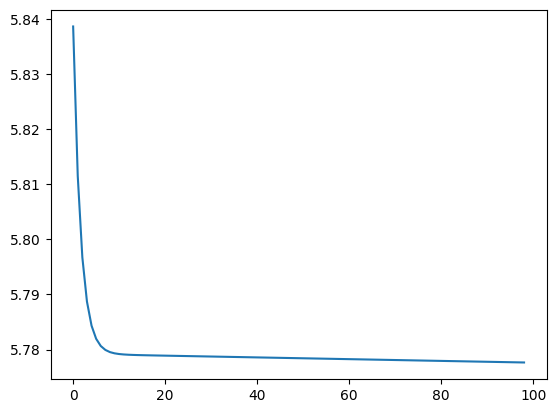

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)
print(list_mse[110])
# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse[11:110])
plt.show()

5.256326457828409


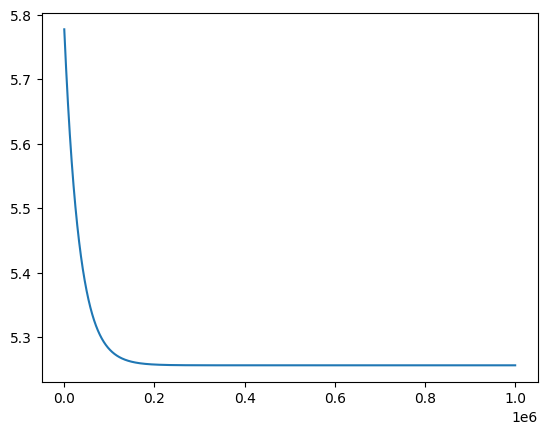

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=0.67
# theta1=13
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05
# x = data['TV']
h = hip(theta_0,theta_1,x)
print(list_mse[1000000])
# y = data['# Shares']
# costo = MSE(theta_0 , theta_1 , x , y)
# print("Costo: ",costo)

import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse[110:1000000])
plt.show()

#gradiente descendente multiple

In [ ]:
def MSE(theta0,theta1,x,y):
    block = hip(theta0,theta1,x) - y

    m = len(x)
    return sum(block*block)/(2*m)

def hip(theta_0,theta_1,x):
    h = theta_1*x + theta_0
    return h

#funciones generalizado
def h_m(X,theta):
    h = np.dot(X,theta)
    return h

def MSE_m(theta,x,y):
    block = h_m(x,theta) - y
    m = len(x)
    return np.dot(block.transpose(),block)/(2*m)

def R2(h,Y):
    return (1 - sum((h-Y)**2)/sum((Y-np.mean(Y))**2))

def normalizacion(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return  (data - mean) / std_dev
#como saldria el gradiente descendiente


In [ ]:
import numpy as np
columns_lst = list(data.columns)[1:4]
print(data[columns_lst])
ones=np.ones((len(data['TV']),1))
print("ones="+str(ones.shape))
print('data= '+str(data[columns_lst].shape))
theta = np.random.rand(4,1) #numero de caracteristicas
X = np.hstack((ones,data[columns_lst])) #numero de caracteristicas + 1
h = h_m(X,theta)
Y = data['Sales']
Y = np.array(Y).reshape(200,1)

print('X=ones hstack data= '+str(X.shape))
print('theta='+str(theta.shape))
print('h=X dot theta='+str(h.shape))
# print(np.dot(X,theta))

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
ones=(200, 1)
data= (200, 3)
X=ones hstack data= (200, 4)
theta=(4, 1)
h=X dot theta=(200, 1)


<ipython-input-80-7a7a76977cd8>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Costo: "+str(float(costo)))


Costo: 423.58032992287156
R-squared: [-30.27699456]


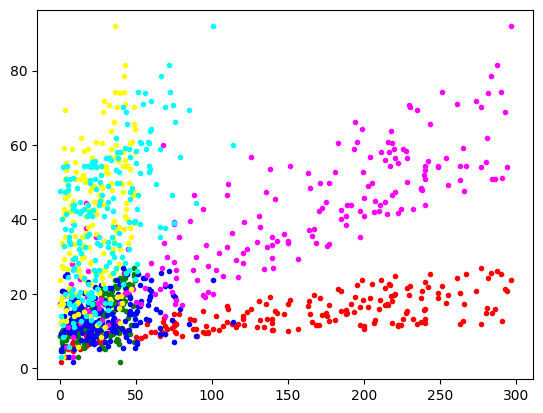

In [ ]:
# columns_lst = list(data.columns)[1:5]
# theta0=6.67
# theta1=0.049155555
# theta = np.array([0.5,0.5,0.5,0.5])
# y = columna ventas x = es columna tv, theta1=80, theta0=0.05x
# X = columnas TV, Radio, Newspaper
import matplotlib.pyplot as plt

# h = h_m(X,theta)
costo = MSE_m(theta, X , Y)
print("Costo: "+str(float(costo)))
R_2 = R2(h,Y)
print("R-squared: "+str(R_2))

import matplotlib.pyplot as plt
x=X[:,1:]
plt.scatter(X[:,1],Y,c='red',marker='.')
plt.scatter(X[:,2],Y,c='green',marker='.')
plt.scatter(X[:,3],Y,c='blue',marker='.')

plt.scatter(X[:,1],h,c='magenta',marker='.')
plt.scatter(X[:,2],h,c='yellow',marker='.')
plt.scatter(X[:,3],h,c='cyan',marker='.')

plt.show()

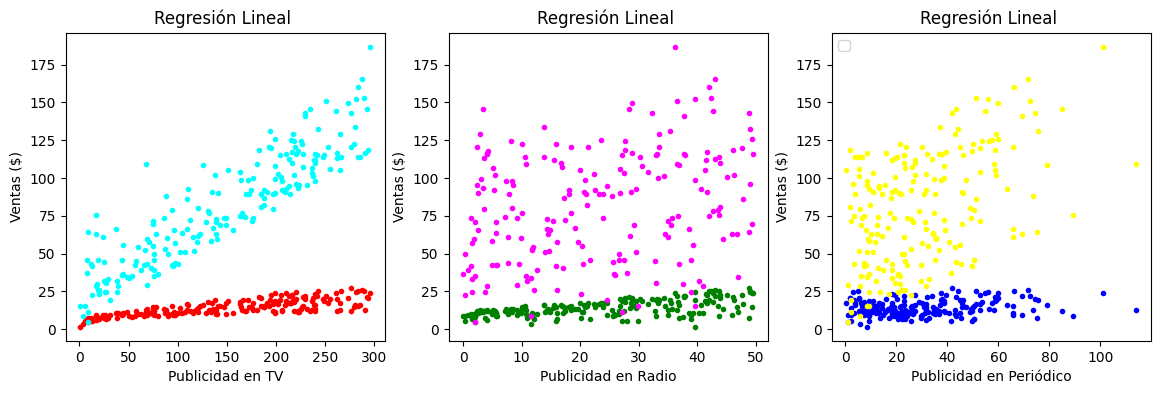

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
plt.scatter(X[:,1],Y,c='red',marker='.')
plt.scatter(X[:,1],h,c='cyan',marker='.')
plt.xlabel('Publicidad en TV')
plt.ylabel('Ventas ($)')
plt.title('Regresión Lineal ')
plt.subplot(1,3,2)
plt.scatter(X[:,2],Y,c='green',marker='.')
plt.scatter(X[:,2],h,c='magenta',marker='.')
plt.xlabel('Publicidad en Radio')
plt.ylabel('Ventas ($)')
plt.title('Regresión Lineal ')
plt.subplot(1,3,3)
plt.scatter(X[:,3],Y,c='blue',marker='.')
plt.scatter(X[:,3],h,c='yellow',marker='.')
# plt.plot(X[:,1],h_m(X[:,:1],theta[:1]))
# plt.plot(X[:,2],h_m(np.array([X[:,0],X[:,2]]).transpose(),[theta[0],theta[2]]))
# plt.plot(X[:,3],h_m(np.array([X[:,0],X[:,3]]).transpose(),[theta[0],theta[3]]))
plt.legend(loc="upper left")
plt.xlabel('Publicidad en Periódico')
plt.ylabel('Ventas ($)')
plt.title('Regresión Lineal ')
plt.show()

#entrenamiento

In [ ]:
m = len(data['Sales'])
mse = MSE_m(theta, X , Y)

alpha = 5e-5
epochs = 500000;
list_theta = []
# list_theta1 = []
list_mse = []

list_theta.append(theta)
# list_theta1.append(theta_1)
list_mse.append(float(mse))

for epoch in range(epochs):
    h = h_m(X,theta)
    partialJ = (1/m)*np.dot(X.transpose(),h-Y)
    theta = theta - alpha*partialJ
    # theta_1 = theta_1 - (alpha/m)*sum( ( hip(theta_0,theta_1,x) - y )*x )
    mse = MSE_m(theta, X , Y)
    list_theta.append(theta)
    # list_theta1.append(theta_1)
    list_mse.append(float(mse))

print("list theta max value: "+str(max(list_theta[0]))+", min value: "+str(min(list_theta[0])))
print("list theta first value: \n"+str(list_theta[0])+",\n last value: \n"+str(list_theta[-1]))
# print("list theta1 max value: "+str(max(list_theta1))+", min value: "+str(min(list_theta1)))
# print("list theta1 first value: "+str(list_theta1[0])+", last value: "+str(list_theta1[-1]))
print("list MSE max value: "+str(max(list_mse))+", min value: "+str(min(list_mse)))
print("list MSE first value: "+str(list_mse[0])+", last value: "+str(list_mse[-1]))
R_2 = R2(h,Y)
print("R-squared: "+str(R_2))

<ipython-input-11-afd22456f63a>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_mse.append(float(mse))
<ipython-input-11-afd22456f63a>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_mse.append(float(mse))


list theta max value: [0.47892182], min value: [0.17408377]
list theta first value: 
[[0.44192251]
 [0.23908671]
 [0.17408377]
 [0.47892182]],
 last value: 
[[ 2.87389015e+00]
 [ 4.59421508e-02]
 [ 1.89275662e-01]
 [-6.42686562e-04]]
list MSE max value: 1011.9786948606903, min value: 1.3923715935216083
list MSE first value: 1011.9786948606903, last value: 1.3923715935216083
R-squared: [0.89718786]


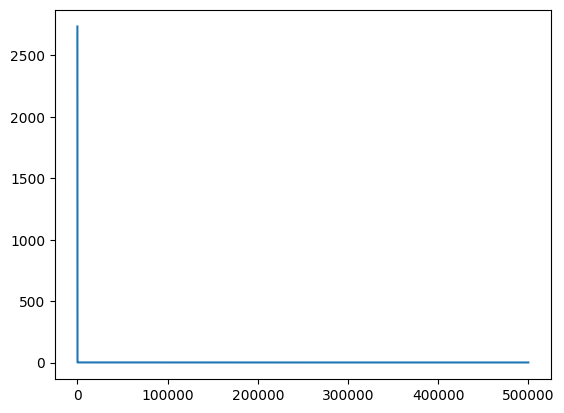

In [ ]:

import matplotlib.pyplot as plt

plt.plot(list_mse)
plt.show()

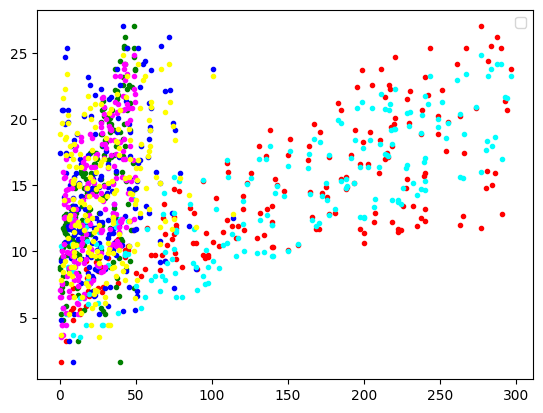

In [ ]:
import matplotlib.pyplot as plt
x=X[:,1:4]

plt.subplot(1,3,1)
plt.subplot(1,3,1)
plt.subplot(1,3,1)
plt.scatter(X[:,1],Y,c='red',marker='.')
plt.scatter(X[:,2],Y,c='green',marker='.')
plt.scatter(X[:,3],Y,c='blue',marker='.')

h = h_m(X,theta)

plt.scatter(X[:,1],h,c='cyan',marker='.')
plt.scatter(X[:,2],h,c='magenta',marker='.')
plt.scatter(X[:,3],h,c='yellow',marker='.')
plt.legend()
# plt.show()

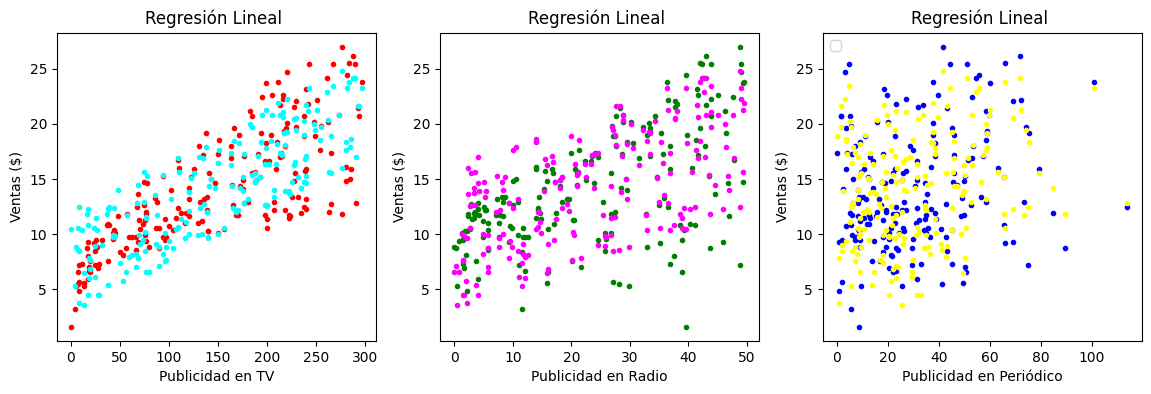

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
plt.scatter(X[:,1],Y,c='red',marker='.')
plt.scatter(X[:,1],h,c='cyan',marker='.')
plt.xlabel('Publicidad en TV')
plt.ylabel('Ventas ($)')
plt.title('Regresión Lineal ')
plt.subplot(1,3,2)
plt.scatter(X[:,2],Y,c='green',marker='.')
plt.scatter(X[:,2],h,c='magenta',marker='.')
plt.xlabel('Publicidad en Radio')
plt.ylabel('Ventas ($)')
plt.title('Regresión Lineal ')
plt.subplot(1,3,3)
plt.scatter(X[:,3],Y,c='blue',marker='.')
plt.scatter(X[:,3],h,c='yellow',marker='.')
# plt.plot(X[:,1],h_m(X[:,:1],theta[:1]))
# plt.plot(X[:,2],h_m(np.array([X[:,0],X[:,2]]).transpose(),[theta[0],theta[2]]))
# plt.plot(X[:,3],h_m(np.array([X[:,0],X[:,3]]).transpose(),[theta[0],theta[3]]))
plt.legend(loc="upper left")
plt.xlabel('Publicidad en Periódico')
plt.ylabel('Ventas ($)')
plt.title('Regresión Lineal ')
plt.show()

   Unnamed: 0     TV  Radio  Newspaper  Sales  Sales_model
0         1.0  230.1   37.8       69.2   22.1    20.551327
1         1.0   44.5   39.3       45.1   10.4    12.329138
2         1.0   17.2   45.9       69.3    9.3    12.307356
3         1.0  151.5   41.3       58.5   18.5    17.611601
4         1.0  180.8   10.8       58.4   12.9    13.187104
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales', 'Sales_model'], dtype='object')


<Axes: xlabel='Newspaper', ylabel='Sales_model'>

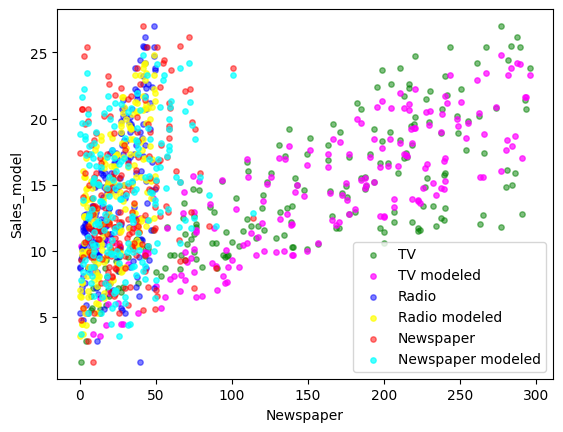

In [ ]:
from matplotlib import pyplot as plt
data_trained = pd.DataFrame(np.hstack([X,Y,h]),columns=['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales','Sales_model'])
print(data_trained.head())
print(data_trained.columns)
ax=data_trained.plot(kind='scatter', x='TV', y='Sales', color='Green', s=15, alpha=.5,label='TV')
#  plt.gca().spines[['top', 'right',]].set_visible(False)
data_trained.plot(kind='scatter', x='TV', y='Sales_model', color='Magenta', s=15, alpha=.7,label='TV modeled', ax=ax)

data_trained.plot(kind='scatter', x='Radio', y='Sales', color='Blue', s=15, alpha=.5,label='Radio', ax=ax)
# plt.gca().spines[['top', 'right',]].set_visible(False)
data_trained.plot(kind='scatter', x='Radio', y='Sales_model', color='Yellow', s=15, alpha=.7,label='Radio modeled', ax=ax)

data_trained.plot(kind='scatter', x='Newspaper', y='Sales',color='Red', s=15, alpha=.5,label='Newspaper', ax=ax)
# plt.gca().spines[['top', 'right',]].set_visible(False)
data_trained.plot(kind='scatter', x='Newspaper', y='Sales_model',color='Cyan', s=15, alpha=.7,label='Newspaper modeled', ax=ax)

#ahora estandarizado

<ipython-input-13-242a322fac3a>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Costo: "+str(float(costo)))


Costo: 101.4406890183672
R-squared: [-689.95454323]


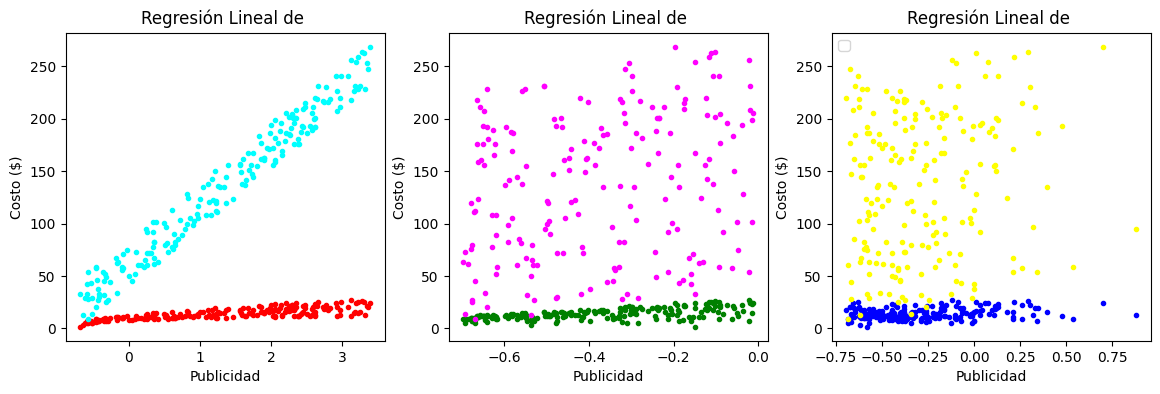

In [ ]:
X_norm = normalizacion(X)
theta = np.random.rand(4,1) #numero de caracteristicas

h = h_m(X,theta)
costo = MSE_m(theta, X_norm , Y)
print("Costo: "+str(float(costo)))
R_2 = R2(h,Y)
print("R-squared: "+str(R_2))

import matplotlib.pyplot as plt
x=X_norm[:,1:]
plt.figure(figsize = (14,4))
# plt.scatter(X_norm[:,1],Y,c='red',marker='.')
# plt.scatter(X_norm[:,2],Y,c='green',marker='.')
# plt.scatter(X_norm[:,3],Y,c='blue',marker='.')

# plt.scatter(X_norm[:,1],h,c='cyan',marker='.')
# plt.scatter(X_norm[:,2],h,c='magenta',marker='.')
# plt.scatter(X_norm[:,3],h,c='yellow',marker='.')

plt.subplot(1,3,1)
plt.scatter(X_norm[:,1],Y,c='red',marker='.')
plt.scatter(X_norm[:,1],h,c='cyan',marker='.')
plt.xlabel('Publicidad')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal de ')
plt.subplot(1,3,2)
plt.scatter(X_norm[:,2],Y,c='green',marker='.')
plt.scatter(X_norm[:,2],h,c='magenta',marker='.')
plt.xlabel('Publicidad')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal de ')
plt.subplot(1,3,3)
plt.scatter(X_norm[:,3],Y,c='blue',marker='.')
plt.scatter(X_norm[:,3],h,c='yellow',marker='.')
# plt.plot(X[:,1],h_m(X[:,:1],theta[:1]))
# plt.plot(X[:,2],h_m(np.array([X[:,0],X[:,2]]).transpose(),[theta[0],theta[2]]))
# plt.plot(X[:,3],h_m(np.array([X[:,0],X[:,3]]).transpose(),[theta[0],theta[3]]))
plt.legend(loc="upper left")
plt.xlabel('Publicidad')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal de ')
plt.show()

In [ ]:
m = len(data['Sales'])
mse = MSE_m(theta, X_norm , Y)

alpha = 5e-1
epochs = 1000;
list_theta = []
# list_theta1 = []
list_mse = []

list_theta.append(theta)
# list_theta1.append(theta_1)
list_mse.append(float(mse))

for epoch in range(epochs):
    h = h_m(X_norm,theta)
    partialJ = (1/m)*np.dot(X_norm.transpose(),h-Y)
    theta = theta - alpha*partialJ
    # theta_1 = theta_1 - (alpha/m)*sum( ( hip(theta_0,theta_1,x) - y )*x )
    mse = MSE_m(theta, X_norm , Y)
    list_theta.append(theta)
    # list_theta1.append(theta_1)
    list_mse.append(float(mse))

print("list theta max value: "+str(max(list_theta[0]))+", min value: "+str(min(list_theta[0])))
print("list theta first value: \n"+str(list_theta[0])+",\n last value: \n"+str(list_theta[-1]))
# print("list theta1 max value: "+str(max(list_theta1))+", min value: "+str(min(list_theta1)))
# print("list theta1 first value: "+str(list_theta1[0])+", last value: "+str(list_theta1[-1]))
print("list MSE max value: "+str(max(list_mse))+", min value: "+str(min(list_mse)))
print("list MSE first value: "+str(list_mse[0])+", last value: "+str(list_mse[-1]))
R_2 = R2(h,Y)
print("R-squared: "+str(R_2))

list theta max value: [0.78121868], min value: [0.12018914]
list theta first value: 
[[0.3201611 ]
 [0.76907138]
 [0.78121868]
 [0.12018914]],
 last value: 
[[-21.51465002]
 [  3.31088347]
 [ 13.63935413]
 [ -0.07505494]]
list MSE max value: 101.4406890183672, min value: 1.3920631572591406
list MSE first value: 101.4406890183672, last value: 1.3920631572591406
R-squared: [0.89721064]


<ipython-input-14-c7ed59dc6eb5>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_mse.append(float(mse))
<ipython-input-14-c7ed59dc6eb5>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  list_mse.append(float(mse))


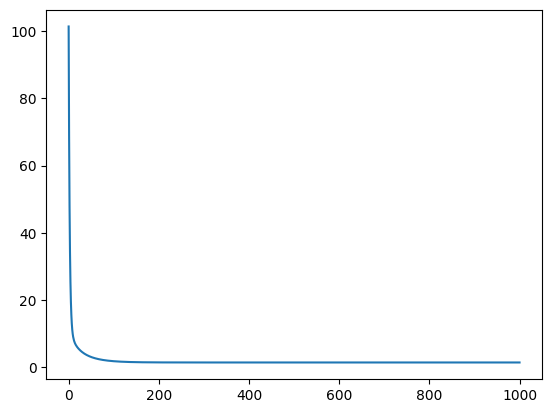

In [ ]:
import matplotlib.pyplot as plt
# x = np.arange(-0,100,1)
# plt.scatter(x,y,marker='.')
plt.plot(list_mse)
plt.show()

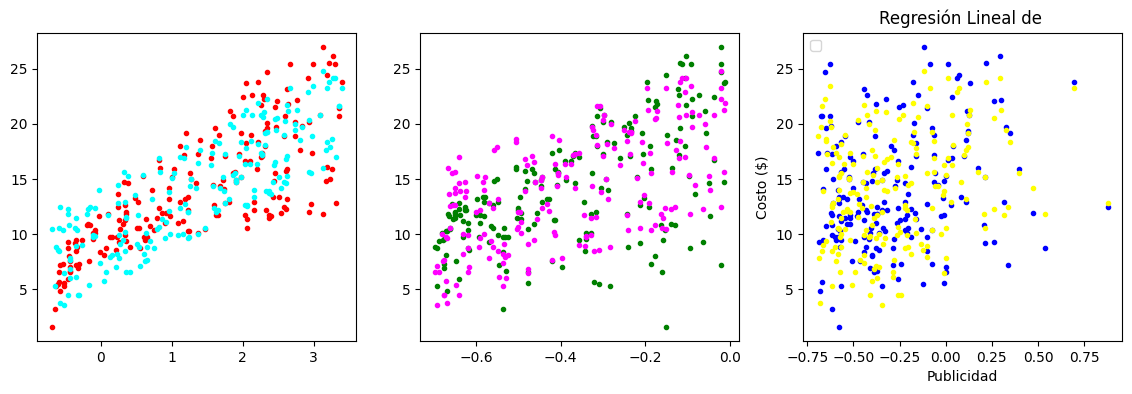

In [ ]:
import matplotlib.pyplot as plt
x=X[:,1:4]
plt.figure(figsize = (14,4))

plt.subplot(1,3,1)
plt.scatter(X_norm[:,1],Y,c='red',marker='.')
plt.scatter(X_norm[:,1],h,c='cyan',marker='.')
plt.subplot(1,3,2)
plt.scatter(X_norm[:,2],Y,c='green',marker='.')
plt.scatter(X_norm[:,2],h,c='magenta',marker='.')
plt.subplot(1,3,3)
plt.scatter(X_norm[:,3],Y,c='blue',marker='.')
plt.scatter(X_norm[:,3],h,c='yellow',marker='.')

h = h_m(X_norm,theta)

plt.legend(loc="upper left")
plt.xlabel('Publicidad')
#plt.xlabel('Indice de Masa Corporal (BMI)')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal de ')
plt.show()

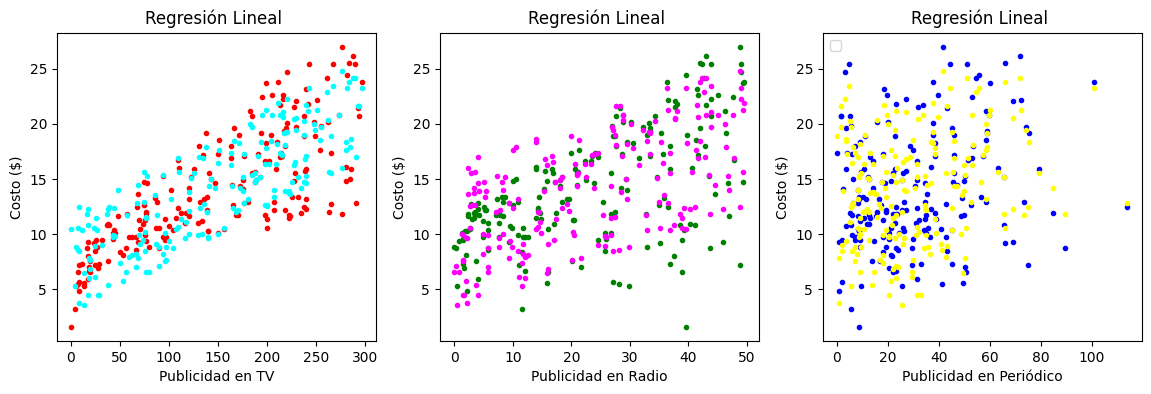

In [ ]:
plt.figure(figsize = (14,4))
plt.subplot(1,3,1)
plt.scatter(X[:,1],Y,c='red',marker='.')
plt.scatter(X[:,1],h,c='cyan',marker='.')
plt.xlabel('Publicidad en TV')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal ')
plt.subplot(1,3,2)
plt.scatter(X[:,2],Y,c='green',marker='.')
plt.scatter(X[:,2],h,c='magenta',marker='.')
plt.xlabel('Publicidad en Radio')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal ')
plt.subplot(1,3,3)
plt.scatter(X[:,3],Y,c='blue',marker='.')
plt.scatter(X[:,3],h,c='yellow',marker='.')
# plt.plot(X[:,1],h_m(X[:,:1],theta[:1]))
# plt.plot(X[:,2],h_m(np.array([X[:,0],X[:,2]]).transpose(),[theta[0],theta[2]]))
# plt.plot(X[:,3],h_m(np.array([X[:,0],X[:,3]]).transpose(),[theta[0],theta[3]]))
plt.legend(loc="upper left")
plt.xlabel('Publicidad en Periódico')
plt.ylabel('Costo ($)')
plt.title('Regresión Lineal ')
plt.show()

   Unnamed: 0     TV  Radio  Newspaper  Sales  Sales_model
0         1.0  230.1   37.8       69.2   22.1    20.523974
1         1.0   44.5   39.3       45.1   10.4    12.337852
2         1.0   17.2   45.9       69.3    9.3    12.307667
3         1.0  151.5   41.3       58.5   18.5    17.597827
4         1.0  180.8   10.8       58.4   12.9    13.188675
Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales', 'Sales_model'], dtype='object')


<Axes: xlabel='Newspaper', ylabel='Sales_model'>

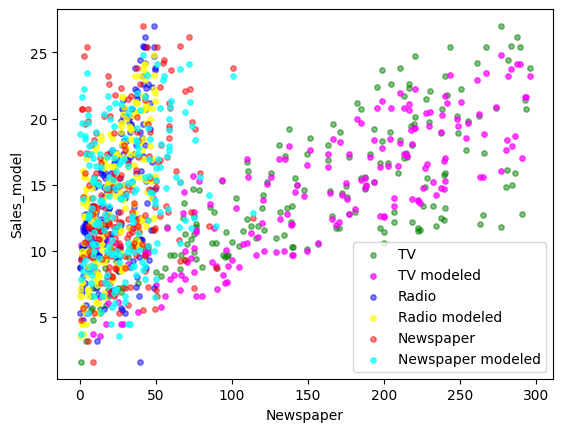

In [ ]:
from matplotlib import pyplot as plt
data_trained = pd.DataFrame(np.hstack([X,Y,h]),columns=['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales','Sales_model'])
print(data_trained.head())
print(data_trained.columns)
ax=data_trained.plot(kind='scatter', x='TV', y='Sales', color='Green', s=15, alpha=.5,label='TV')
#  plt.gca().spines[['top', 'right',]].set_visible(False)
data_trained.plot(kind='scatter', x='TV', y='Sales_model', color='Magenta', s=15, alpha=.7,label='TV modeled', ax=ax)

data_trained.plot(kind='scatter', x='Radio', y='Sales', color='Blue', s=15, alpha=.5,label='Radio', ax=ax)
# plt.gca().spines[['top', 'right',]].set_visible(False)
data_trained.plot(kind='scatter', x='Radio', y='Sales_model', color='Yellow', s=15, alpha=.7,label='Radio modeled', ax=ax)

data_trained.plot(kind='scatter', x='Newspaper', y='Sales',color='Red', s=15, alpha=.5,label='Newspaper', ax=ax)
# plt.gca().spines[['top', 'right',]].set_visible(False)
data_trained.plot(kind='scatter', x='Newspaper', y='Sales_model',color='Cyan', s=15, alpha=.7,label='Newspaper modeled', ax=ax)

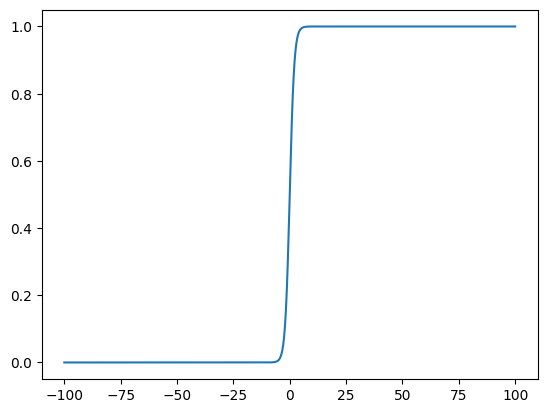

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-100, 100,1000)
h = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, h)



In [ ]:
def cross_entropy(h,y):
    if y==1:
        return -np.log(h)
    elif y==0:
        return -np.log(1-h)

<ipython-input-13-c28dc850cf71>:3: RuntimeWarning: invalid value encountered in log
  return -np.log(h)
<ipython-input-13-c28dc850cf71>:5: RuntimeWarning: invalid value encountered in log
  return -np.log(1-h)


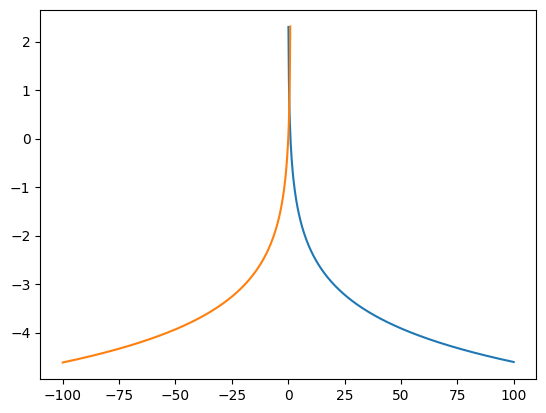

In [ ]:
h = np.linspace(-100, 100,1000)

y_1 = cross_entropy(h,1)
y_0 = cross_entropy(h,0)
fig, ax = plt.subplots()
ax.plot(h, y_1)
ax.plot(h, y_0)

La función costo puede escribirse como

$J(\theta)=-\frac{1}{m}\sum_{i=1}^m[y_ilog(h_\theta(x_i))+(1-y_i)log(1-h_\theta(x_i))]$

$\frac{\partial J}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m[ \frac{y_i}{(h_\theta(x_i))ln(10)} \frac{\partial}{\partial \theta}(h_\theta (x_i)) + \frac{1-y_i}{(1-h_\theta(x_i))ln(10)} \frac{\partial}{\partial \theta}(1-h_\theta (x_i))]$

$\frac{\partial J}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m[ \frac{y_i}{h_\theta(x_i)} \frac{\partial}{\partial \theta}(h_\theta (x_i)) + \frac{1-y_i}{1-h_\theta(x_i)} \frac{\partial}{\partial \theta}(1-h_\theta (x_i))]$

$\frac{\partial J}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m[ \frac{y_i}{h_\theta(x_i)} \frac{\partial}{\partial \theta}(h_\theta (x_i)) - \frac{1-y_i}{1-h_\theta(x_i)} \frac{\partial}{\partial \theta}(h_\theta (x_i))]= \frac{1}{m}\sum_{i=1}^m[ \frac{y_i}{h_\theta(x_i)} - \frac{1-y_i}{1-h_\theta(x_i)}]\frac{\partial}{\partial \theta}(h_\theta (x_i))$

si sabemos que:

$h_\theta(x)=\sigma=\frac{1}{1+e^{-Z(\theta)}}$

$Z=X \cdot \theta$

$\frac{dZ}{d\theta}=X$

y su derivada es:

$\frac{\partial h}{\partial z}=\sigma'=\frac{e^{-Z}}{(1+e^{-Z})^2} = \frac{1}{1+e^{-Z}}\frac{e^{-Z}}{1+e^{-Z}}=\sigma(Z)\sigma(-Z)$

Entonces

$\frac{\partial J}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m[ \frac{y_i}{\sigma(x_i)} - \frac{1-y_i}{1-\sigma(x_i)}]\sigma(x_i)'=[\frac{Y}{\sigma(X)}-\frac{1-Y}{1-\sigma(X)}]\cdot\sigma'(X)$
$= \frac{1}{m}\sum_{i=1}^m[ \frac{y_i}{\sigma(x_i)} - \frac{1-y_i}{1-\sigma(x_i)}]\sigma(x_i)'=[\frac{Y}{\sigma(X)}-\frac{1-Y}{1-\sigma(X)}]\cdot\sigma'(X)$



la derivada es:
$\frac{\partial J}{\partial \theta}=(h_\theta(X)-y)X$